In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import *
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score


In [14]:
df = pd.read_csv('processed_data_toDummies.csv')

In [9]:
df.head(2)

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33601 entries, 0 to 33600
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           33601 non-null  int64  
 1   Hobbyist                                       33601 non-null  object 
 2   ConvertedComp                                  33601 non-null  float64
 3   Country                                        33601 non-null  object 
 4   EdLevel                                        33138 non-null  object 
 5   Employment                                     33561 non-null  object 
 6   JobSat                                         33526 non-null  float64
 7   OrgSize                                        31904 non-null  object 
 8   UndergradMajor                                 30515 non-null  object 
 9   YearsCodePro                                   335

In [21]:
## wbieramy zmienne, któe mają sens - wyrzucamy takie, które jednoznaczne charakteryzują obserwację
feature_columns = ['Year','Hobbyist','Country','EdLevel','Employment','JobSat','OrgSize', 'UndergradMajor', 'YearsCodePro']
feature_columns = ['Year', 'JobSat', 'YearsCodePro', 'Data scientist or machine learning specialist', 'Database administrator', 'Data or business analyst', 'Engineer, data']
target = 'ConvertedComp'
## usuwamy wybrakowane dane 
X = df[ feature_columns + [target]].dropna()
Y = X[target]
X1 = X[feature_columns]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,test_size=0.1)

In [24]:
# zakres paametru
max_depths = list(range(2,15))
# pusta lista do której będziemy "wkładać" accuracy dla zbioru treningowego

model = DecisionTreeRegressor(max_depth=20).fit(X_train,Y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
    
mse = mean_squared_error(Y_test, predict_test, squared=True)
rmse = mean_squared_error(Y_test, predict_test, squared=False)
print(np.mean(Y_test), np.std(Y_test))
print(np.mean(predict_test), np.std(predict_test))
print(f'mse {mse}, rmse {rmse}')

fig = plt.figure(figsize=(8,8))
#plt.scatter(Y_test, Y_test - predict_test)

62752.24206349206 51819.10884010907
63721.49900788931 31914.960384884926
mse 2549688013.8728356, rmse 50494.435474345446


<Figure size 576x576 with 0 Axes>

In [53]:
forest = RandomForestRegressor(max_depth=6, min_samples_leaf=4)
forest.fit(X_train,Y_train)
predict_train = forest.predict(X_train)
predict_test = forest.predict(X_test)

mse = mean_squared_error(Y_test, predict_test, squared=True)
rmse = mean_squared_error(Y_test, predict_test, squared=False)
print('target', np.mean(Y_test), np.std(Y_test))
print('guess', np.mean(predict_test), np.std(predict_test))
print(f'mse {mse}, rmse {rmse}')

target 62752.24206349206 51819.10884010907
guess 63584.26745693293 23539.907224748717
mse 2153967313.5708857, rmse 46410.85340274283


[0.00509721 0.11226162 0.73178005 0.01309264 0.07924123 0.02186902
 0.03665823]


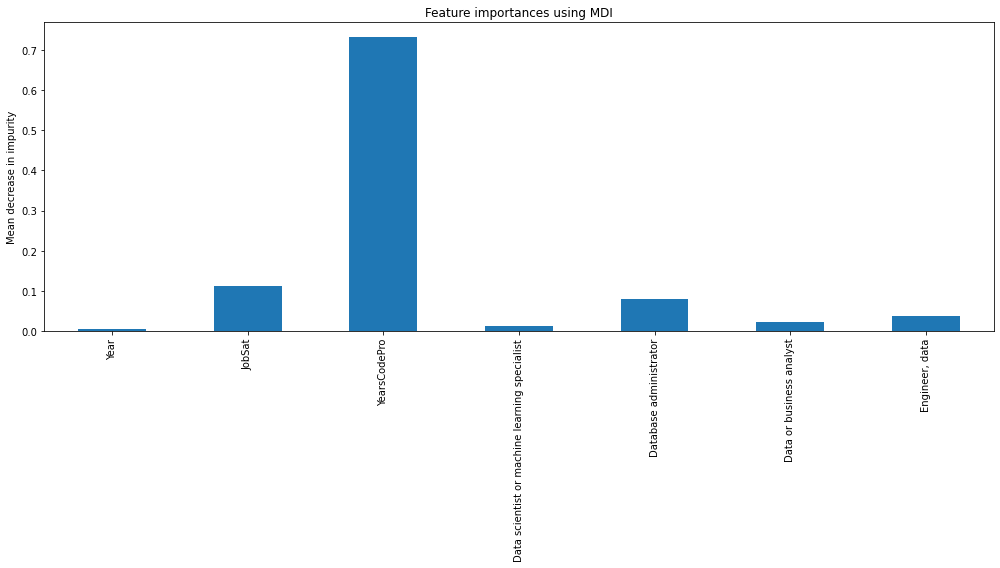

In [54]:
importances = forest.feature_importances_
print(importances)
forest_importances = pd.Series(importances, index=feature_columns)

fig, ax = plt.subplots(figsize=(14,8))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [51]:
# grid search
params = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [3, 4, 5, 6, 7]
}
forest = RandomForestRegressor()
gs = GridSearchCV(forest, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)
gs.fit(X_train, Y_train)
gs.score(X_test, Y_test)

-46434.38121921951

In [52]:
print(-gs.best_score_)
print(gs.best_estimator_)

45639.70447416938
RandomForestRegressor(max_depth=6, min_samples_leaf=4)


In [1]:
forest = gs.best_estimator_
forest.fit(X_train,Y_train)
predict_train = forest.predict(X_train)
predict_test = forest.predict(X_test)

mse = mean_squared_error(Y_test, predict_test, squared=True)
rmse = mean_squared_error(Y_test, predict_test, squared=False)
print('target', np.mean(Y_test), np.std(Y_test))
print('guess', np.mean(predict_test), np.std(predict_test))
print(f'mse {mse}, rmse {rmse}')

NameError: name 'gs' is not defined

In [ ]:
class RandomTree():
    def __init__(self, df, target='ConvertedComp'):
        self.df = df
        self.X, self.Y = self.split_xy(target)
        self.model = self.grid_search()
        self.model.fit(self.X, self.Y)
        
    def grid_search(self):
        params = {
            'max_depth': [3, 4, 5, 6, 7],
            'min_samples_leaf': [3, 4, 5, 6, 7]
        }
        forest = RandomForestRegressor()
        gs = GridSearchCV(forest, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)
        gs.fit(self.X, self.Y)
        model = gs.best_estimator_
        print(f'Score (rmse) for random forest is: {-gs.best_score_}')
        return model

    def predict(self, x):
        predict = forest.predict(x)
        return predict

    def split_xy(self, target):
        columns = list(set(self.df.columns) - set(target))
        X = self.df[columns]
        Y = self.df[target]
        return X, Y